In [77]:
import numpy as np 
import pandas as pd 
import matplotlib
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [3]:

df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
# renaming Column
df_yield = df_yield.rename(index=str, columns={"Value": "yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
# Removing unwanted columns
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [6]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
Area     56717 non-null object
Item     56717 non-null object
Year     56717 non-null int64
yield    56717 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
df_yield.describe()

,Year,yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


Adding 2nd Dataset : Rainfall

In [8]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [9]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 Area                            6727 non-null object
Year                             6727 non-null int64
average_rain_fall_mm_per_year    5953 non-null object
dtypes: int64(1), object(2)
memory usage: 157.7+ KB


In [10]:
df_rain.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


We see that the 'average_rain_fall_mm_per_year' column has datatype of object. we need to convert this to float in order to perform further operation

In [11]:
df_rain = df_rain.convert_objects(convert_numeric=True)
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 Area                            6727 non-null object
Year                             6727 non-null int64
average_rain_fall_mm_per_year    5947 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.7+ KB


/Users/yuvraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [14]:
# droping any empty rows from dataset 
df_rain = df_rain.dropna()

In [15]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [16]:
#Merging yield and rain dataset
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [17]:
yield_df.head()

,Area,Item,Year,yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [18]:
yield_df.tail()

,Area,Item,Year,yield,average_rain_fall_mm_per_year
25380,Zimbabwe,"Rice, paddy",2016,22828,657.0
25381,Zimbabwe,Sorghum,2016,2688,657.0
25382,Zimbabwe,Soybeans,2016,12727,657.0
25383,Zimbabwe,Sweet potatoes,2016,22212,657.0
25384,Zimbabwe,Wheat,2016,18294,657.0


The dataset has data available from 1985 to 2016

In [24]:
#Adding pesticide data
df_pesticide = pd.read_csv('pesticides.csv')
df_pesticide.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [25]:
#renaming columns to more understandable names
df_pesticide = df_pesticide.rename(index=str, columns={"Value": "pesticides_used(tons)"})
df_pesticide = df_pesticide.drop(['Element','Domain','Unit','Item'], axis=1)
df_pesticide.head()

,Area,Year,pesticides_used(tons)
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [26]:
df_pesticide.describe()

,Year,pesticides_used(tons)
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [27]:
# merge Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pesticide, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [28]:
yield_df.head()

,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_used(tons)
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [29]:
#Adding temperature dataset
df_temp=  pd.read_csv('temp.csv')
df_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [30]:
df_temp.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [32]:
df_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [34]:
df_temp = df_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
df_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


FINAL DATASET

In [36]:
yield_df = pd.merge(yield_df,df_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_used(tons),avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [37]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
yield                            0
average_rain_fall_mm_per_year    0
pesticides_used(tons)            0
avg_temp                         0
dtype: int64

In [43]:
#Seeing different crops grown
yield_df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [45]:
#Top 50 countries in terms of overall yield
yield_df.groupby(['Area'],sort=True)['yield'].sum().nlargest(50)

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Chile                  20561214
Jamaica                19698007
New Zealand            17657728
El Salvador            16855944
Guatemala              16508723
France                 15790618
Bangladesh             15440318
Peru                   15201910
Saudi Arabia           15171886
Mali                   15106720
Suriname               14786468
Gre

In [52]:
#Seeing indias crop production

yield_df.groupby(['Item',yield_df['Area']=='India'],sort=True)['yield'].sum().nlargest(10)

Item                  Area 
Potatoes              False    762228912
Sweet potatoes        False    299637486
Cassava               False    164919886
                      True     142810624
Maize                 False    139865009
Rice, paddy           False    122665069
Wheat                 False    102725751
Yams                  False     96676873
Potatoes              True      92122514
Plantains and others  False     58958974
Name: yield, dtype: int64

India


[Text(0, 0.5, 'India'), Text(0.5, 0, 'Yield of India')]

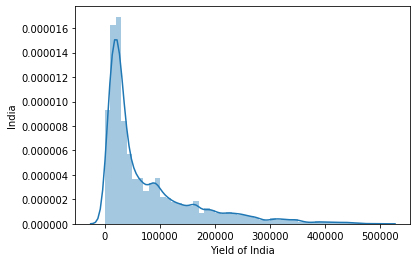

In [54]:
country = input()
team= yield_df[yield_df['Area']==country]

country_yield = yield_df['yield']
# total_by_team
ax=sns.distplot(country_yield)
ax.set(xlabel="Yield of {}".format(country), ylabel =country)

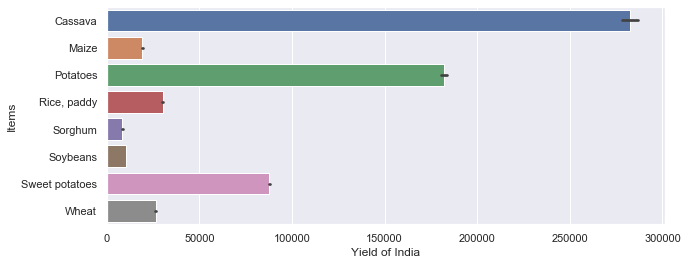

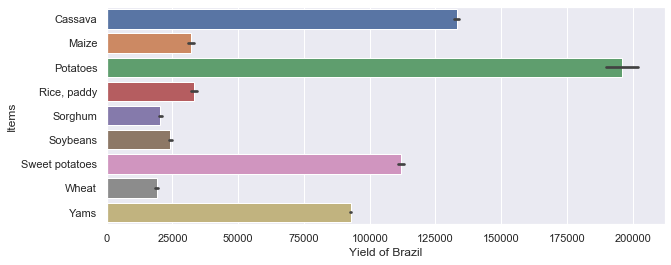

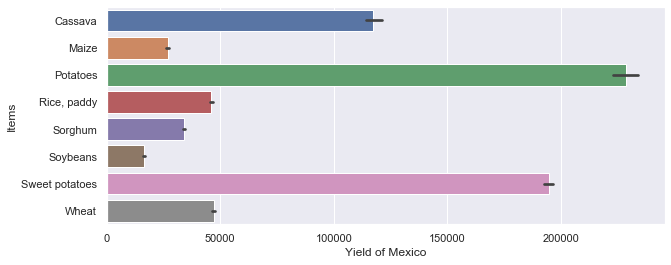

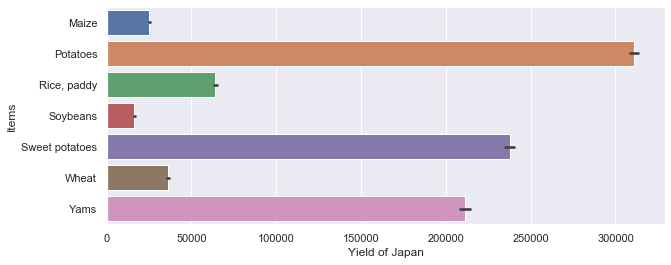

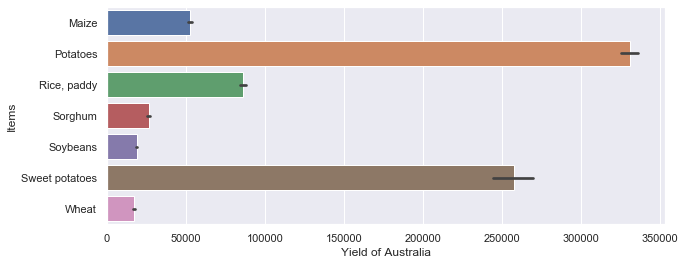

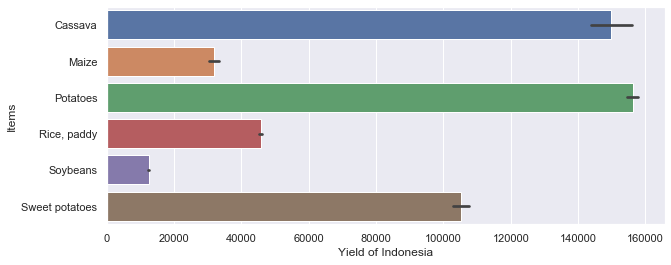

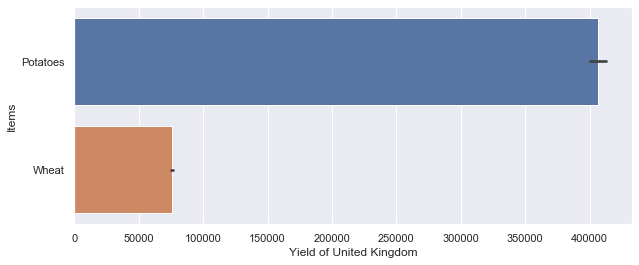

In [78]:
country_list = list(['India','Brazil','Mexico','Japan','Australia','Indonesia','United Kingdom'])
for country in country_list:
    yield_by_country= yield_df[yield_df['Area']==country]

    country_yield = yield_by_country['yield']
    country_item = yield_by_country['Item']
    fig, ax = plt.subplots(figsize=(10,4))
    ax=sns.barplot(country_yield,country_item)
    ax.set(xlabel="Yield of {}".format(country), ylabel ="Items")
    plt.show()

Model Training


In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [82]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'yield']
label=yield_df['yield']
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [83]:
features

array([[0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 42)

In [87]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(x_train,y_train)
    y_pred=fit.predict(x_test)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

model_train=list(map(compare_models,models)) 
print(*model_train, sep = "\n")

/Users/yuvraj/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['GradientBoostingRegressor', 0.9054479404420216]
['RandomForestRegressor', 0.6842599943583404]
['SVR', -0.20354352330289416]
['DecisionTreeRegressor', 0.9796270090686061]


In [92]:
yield_df_onehot.head()

,yield,average_rain_fall_mm_per_year,pesticides_used(tons),avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:

# test_df=pd.DataFrame(x_train,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'yield'].columns) 
clf=DecisionTreeRegressor()
model=clf.fit(x_train,y_train)


In [99]:
pred=model.predict(x_test)
x_test1=np.array(x_test)
y_test1=np.array(y_test)

In [105]:
print("Actual Result    Predicted Result")
print()
for w in range(len(y_test)):
#     print(y_test1[w],'',x_test1[w],'                                               ',"{:.2f}".format(pred[w]))
    print(y_test1[w],'','  ',"{:.2f}".format(pred[w]))
    print()

Actual Result    Predicted Result

69220     70954.00

20000     25000.00

51206     51206.00

166986     166986.00

56319     56522.00

26163     26163.00

30708     30708.00

109771     109771.00

241650     231985.00

47500     42115.00

14614     23360.00

62061     65551.00

3332     4091.00

27105     27105.00

12512     16250.00

53362     36070.00

155782     117628.00

158256     168931.00

26937     26937.00

32222     32222.00

36070     36070.00

71727     77444.00

194380     194380.00

33333     31077.00

7537     7234.00

332957     346780.00

104452     104452.00

10125     8696.00

8156     4975.00

17086     17086.00

36212     28929.00

26195     26195.00

10415     10415.00

25539     25539.00

83723     83723.00

10145     10145.00

22493     22493.00

23429     23429.00

11463     12608.00

58929     8371.00

7333     7120.00

5821     5821.00

19757     19757.00

9106     9106.00

26103     24906.00

100000     100000.00

194173     194173.00

5644     8006.00

1

19868     18096.00

96078     96078.00

171249     125000.00

290981     290981.00

19113     19575.00

7715     7715.00

28962     28929.00

12562     14542.00

107674     107674.00

24954     28037.00

15242     14970.00

15289     15289.00

29667     29667.00

28965     28965.00

22580     22580.00

50111     32797.00

140795     140795.00

33518     33518.00

105177     105177.00

88346     88346.00

113035     113035.00

93333     132882.00

26125     26125.00

27542     27542.00

313645     313645.00

26125     26125.00

29068     20698.00

45365     45365.00

72244     72244.00

119978     106321.00

28303     28303.00

53603     58281.00

88427     88427.00

32888     32888.00

69084     67992.00

33254     31218.00

27227     27537.00

422075     443191.00

22066     27031.00

22493     22493.00

5748     6835.00

24561     24561.00

49103     49103.00

27510     20107.00

36909     36909.00

17969     17969.00

104168     104168.00

88588     88588.00

28516     28516.00

283

33260     33907.00

5897     5999.00

9999     9988.00

68000     68000.00

267752     267752.00

13426     13463.00

295909     295909.00

91025     91025.00

21703     21703.00

36387     34544.00

23267     23267.00

10000     12020.00

52247     52282.00

55044     58527.00

22828     22828.00

364770     364770.00

132795     132795.00

90559     81380.00

130631     130631.00

354317     354317.00

94599     94599.00

186443     186443.00

10000     10000.00

50057     50057.00

16015     16015.00

26154     26154.00

9345     9275.00

33320     39529.00

83453     83453.00

66354     66354.00

17424     17319.00

27182     27182.00

6220     6250.00

24771     24771.00

121739     120000.00

8981     8981.00

24752     21496.00

29904     34000.00

64479     77740.00

17853     17853.00

45199     35714.00

23665     23665.00

118750     108376.00

142167     144356.00

33246     33246.00

11930     14495.00

10789     10789.00

31775     31775.00

60452     68133.00

15057     

9519     12369.00

17768     17768.00

141637     141637.00

18706     12069.00

7624     7624.00

335861     367969.00

11357     9557.00

169416     164330.00

183627     183627.00

26972     26972.00

9101     7838.00

110678     112285.00

29285     29285.00

31158     31158.00

91773     91773.00

37288     37193.00

22493     22493.00

145662     145662.00

66264     64672.00

349594     349594.00

26163     26163.00

12870     30385.00

7161     7161.00

157368     140000.00

132817     132806.00

161648     170803.00

137820     134713.00

355757     328115.00

38752     38752.00

205381     205381.00

110351     110351.00

28276     27931.00

90080     90080.00

43571     38110.00

11770     12231.00

355463     355463.00

38746     38746.00

67100     35000.00

98176     83305.00

36324     36324.00

127352     127352.00

166362     166362.00

181890     150581.00

36387     34544.00

31329     31329.00

25395     25395.00

18158     19295.00

65604     65604.00

17275     20

37295     37295.00

109103     103175.00

19556     18803.00

38161     39356.00

94918     94918.00

10769     12000.00

2074     2333.00

28420     33583.00

19332     27500.00

11202     11202.00

27105     27105.00

12351     12351.00

219196     134713.00

95930     94217.00

14717     14717.00

17975     17975.00

267752     267752.00

18506     18831.00

34481     34481.00

45739     45739.00

104108     104108.00

22353     23910.00

9654     9659.00

120680     120680.00

26188     26188.00

80154     76528.00

140491     140332.00

86553     86553.00

220905     220905.00

183745     183745.00

149768     149768.00

28488     28488.00

27156     27156.00

47633     47633.00

160109     160109.00

10700     10700.00

28800     34444.00

154679     154679.00

32367     35286.00

4906     9755.00

15078     15078.00

36440     55172.00

100691     96099.00

181389     185053.00

28930     28930.00

343433     343433.00

79979     79979.00

9514     14628.00

25623     25623.00



169913     169913.00

28850     28850.00

46792     46792.00

15568     22239.00

17899     15318.00

365680     419798.00

31831     30146.00

5931     5931.00

18209     18209.00

301646     204781.00

28271     28271.00

36392     38541.00

23378     23378.00

22883     22883.00

28645     28645.00

64480     56867.00

33604     28432.00

152304     152304.00

92139     92139.00

22091     22091.00

94211     94211.00

11950     17174.00

91543     84317.00

19974     20994.00

365680     419798.00

65135     65222.00

23267     23267.00

136703     136703.00

33823     33823.00

88943     88943.00

16758     16758.00

23000     7640.00

33200     21466.00

28621     28258.00

16151     13700.00

100000     100000.00

7987     6974.00

21232     23360.00

28771     38239.00

41293     41293.00

26125     26125.00

34918     34918.00

24033     24033.00

112323     112323.00

100000     100000.00

27381     27381.00

272746     272746.00

21630     15750.00

47500     62262.00

79624


24033     24033.00

247725     264228.00

15711     15711.00

228648     260589.00

102177     102177.00

200600     220155.00

236046     242315.00

12868     11803.00

155252     155252.00

7011     7011.00

23497     23497.00

23796     23796.00

6920     6920.00

80475     87585.00

217530     217530.00

5681     5681.00

199165     206388.00

96667     100909.00

67703     67703.00

92123     92123.00

27273     27273.00

14206     14206.00

7968     7968.00

109417     109417.00

57885     57964.00

10032     10041.00

13310     9595.00

24140     24140.00

56258     56258.00

302133     302133.00

21998     21998.00

54030     57143.00

8149     7324.00

25858     25858.00

23796     23796.00

185676     185676.00

28457     28457.00

234388     247421.00

103690     103690.00

130913     130913.00

14013     14013.00

325935     411034.00

65876     39900.00

8714     37980.00

94939     94939.00

33846     90667.00

8235     8235.00

437856     453347.00

7624     7624.00

21

4159     6712.00

134815     134815.00

12968     20478.00

28453     28453.00

385434     385434.00

83453     83453.00

42989     49625.00

74208     83373.00

277258     277258.00

31538     31538.00

17975     17975.00

14235     14235.00

17136     17136.00

7639     7639.00

4512     22828.00

20469     42171.00

47145     40000.00

31759     31759.00

12627     12627.00

12351     12351.00

134795     112295.00

116500     129500.00

141176     138889.00

21731     21731.00

186443     186443.00

96078     96078.00

90024     81592.00

70170     70170.00

192973     192973.00

30081     30123.00

241020     241020.00

23429     23429.00

15927     15927.00

35965     35965.00

20997     19536.00

117588     117588.00

330734     330734.00

26195     26195.00

435194     453347.00

116314     116314.00

26088     26088.00

28116     28116.00

385434     385434.00

27522     27522.00

11998     11998.00

30987     31342.00

28645     28645.00

27501     18000.00

96634     96698.0

22493     22493.00

457565     457565.00

128571     127273.00

185920     185920.00

339011     309147.00

128431     170000.00

200263     200188.00

16758     16758.00

18935     18935.00

132921     135718.00

56231     56231.00

21121     17378.00

4947     5143.00

27000     69500.00

9621     9621.00

86976     86976.00

26016     26016.00

199299     199299.00

392539     392539.00

7774     7774.00

125357     119184.00

40153     40153.00

15238     14612.00

188091     188091.00

30266     34000.00

289832     289832.00

24090     6107.00

11371     11371.00

15711     15711.00

335407     335407.00

73139     69368.00

19215     19215.00

27132     27132.00

53777     53034.00

110676     110676.00

15196     17697.00

12878     12878.00

50134     50134.00

43667     43667.00

40970     40970.00

19222     20843.00

43671     43671.00

274457     274457.00

13325     12465.00

1111     2297.00

6417     6417.00

37322     37322.00

27522     27522.00

30614     29839.00

9


166719     160919.00

256262     262343.00

12002     11999.00

27290     14542.00

24013     20478.00

18173     18173.00

89385     124786.00

24000     24000.00

41805     41805.00

21344     20873.00

10857     10857.00

26005     26005.00

126820     126562.00

19597     20368.00

4448     7393.00

72118     74651.00

62064     61102.00

34193     35000.00

72459     68566.00

22136     22136.00

10415     10415.00

79198     82733.00

10000     10000.00

21211     21211.00

27899     27173.00

185920     185920.00

56674     56674.00

77902     79739.00

52321     60192.00

21218     21218.00

92184     92184.00

69763     69763.00

312107     312107.00

27921     27921.00

43559     43559.00

112822     113197.00

192104     212397.00

22828     22828.00

104167     109091.00

10415     10415.00

28421     27352.00

268306     268306.00

285897     357127.00

183405     183405.00

232463     232463.00

136768     84913.00

20386     20386.00

22008     22008.00

55593     55593

2814     929.00

20301     20301.00

16000     18130.00

14121     14121.00

84440     89857.00

209796     118660.00

57646     57646.00

15198     15198.00

335407     335407.00

170789     224600.00

10628     10628.00

185053     185053.00

25357     22500.00

37500     40000.00

6320     6292.00

93194     93194.00

50514     54011.00

140432     140432.00

34137     38689.00

38000     36000.00

17079     20509.00

56912     56912.00

141869     102216.00

11182     11282.00

15533     15533.00

12752     12276.00

105177     105177.00

171349     171052.00

225747     225747.00

188091     188091.00

14184     10694.00

407441     407441.00

35500     35500.00

23940     23940.00

10926     9927.00

72182     72182.00

64143     64143.00

2382     2862.00

339378     339378.00

18323     20477.00

101288     101288.00

398785     439261.00

139499     139499.00

78646     78808.00

31020     30455.00

123949     148462.00

76000     76000.00

18780     17917.00

28810     28810.

75317     77089.00

112295     136186.00

46159     42190.00

31537     31537.00

20000     20000.00

19042     19042.00

62095     46823.00

3106     5117.00

91501     91501.00

75988     75988.00

240551     220473.00

6099     6099.00

26271     26271.00

23079     12198.00

35878     35878.00

22857     22632.00

328633     328633.00

35878     35878.00

142308     126875.00

13350     13350.00

63418     61230.00

13755     13755.00

26744     29801.00

48887     46956.00

9183     9586.00

37485     41994.00

28162     28162.00

151142     151142.00

18249     18249.00

34221     33907.00

33152     33152.00

20174     20174.00

94599     94599.00

427835     422849.00

141371     141371.00

68081     67299.00

31071     28580.00

7639     7639.00

141176     164286.00

29756     29756.00

11001     11001.00

91413     91413.00

67187     66617.00

61575     70002.00

24852     24852.00

27081     27081.00

121718     121718.00

160124     167489.00

164101     164101.00

26271 


66187     66187.00

8000     7948.00

175712     175712.00

92168     96142.00

239079     239079.00

188908     188908.00

146090     146090.00

16503     16503.00

14916     17561.00

16694     17695.00

110517     110517.00

18453     19174.00

185920     185920.00

11825     17111.00

75504     75504.00

18270     18583.00

9820     9820.00

28048     28048.00

335407     335407.00

12769     12314.00

30495     24475.00

115946     115946.00

207792     202048.00

91471     91471.00

87285     87285.00

10972     10993.00

18091     17758.00

58919     58281.00

93053     93053.00

42214     42214.00

137551     138196.00

12692     11614.00

24761     24761.00

27621     27621.00

197853     133086.00

27132     27132.00

41365     41365.00

247327     247327.00

29812     30138.00

17994     16158.00

13763     13763.00

361747     361747.00

21076     21076.00

119702     175000.00

25401     25401.00

37202     37202.00

20000     20527.00

35943     35943.00

18334     18334

97421     97421.00

361747     361747.00

433870     433870.00

46036     44047.00

97421     97421.00

38406     38406.00

186443     186443.00

146506     146506.00

211841     111359.00

44691     44691.00

12843     11347.00

451182     423155.00

130000     100000.00

164180     164180.00

122220     122220.00

58551     56818.00

122745     122745.00

17111     17111.00

253729     253729.00

25401     25401.00

12360     12360.00

16807     16807.00

7578     7578.00

184997     184997.00

68571     81366.00

72850     80100.00

20597     20597.00

7689     7449.00

60000     33615.00

27000     34222.00

25382     26545.00

14700     14700.00

33084     29673.00

36993     36993.00

50000     65862.00

120710     126562.00

7447     5954.00

61736     64241.00

119548     123128.00

27082     27082.00

47860     47860.00

29481     29481.00

27113     28271.00

250994     250994.00

251662     278193.00

15189     15189.00

21051     20446.00

7388     7330.00

65512     44240.

159224     159224.00

7786     7786.00

47500     62262.00

88946     88946.00

50134     50134.00

234857     203082.00

26222     26222.00

251702     240527.00

45027     45027.00

85778     69468.00

262734     262734.00

36276     27815.00

7602     7602.00

15000     15000.00

40800     40800.00

5409     5524.00

128200     128200.00

24852     24852.00

236046     236046.00

24784     24784.00

431560     453347.00

146506     146506.00

245277     245277.00

26207     26207.00

61474     58833.00

29756     29756.00

20000     21012.00

11533     11533.00

80643     80643.00

27156     27156.00

15196     17697.00

17054     15175.00

4992     4992.00

239523     239523.00

50000     40000.00

188908     188908.00

63540     63540.00

98033     80325.00

14000     14000.00

92000     92000.00

56007     61242.00

15298     15298.00

68053     67453.00

88946     88946.00

86415     86415.00

8235     8235.00

80716     80716.00

7715     7715.00

15421     16050.00

112295    


21419     21613.00

94481     94481.00

386711     408173.00

16758     16758.00

14913     7578.00

86907     86907.00

17297     19534.00

47661     47661.00

21255     21367.00

24912     24912.00

35878     35878.00

18803     18803.00

26163     26163.00

23256     32222.00

15057     15057.00

24784     24784.00

362787     362787.00

258859     258859.00

132270     132270.00

30435     30455.00

5987     5987.00

85694     85694.00

21870     21870.00

28246     29052.00

52274     52274.00

17853     17853.00

8502     8502.00

33071     33071.00

133447     133447.00

32434     35818.00

32966     32966.00

143848     137500.00

136059     136059.00

454162     422227.00

169913     169913.00

30744     27542.00

21321     21321.00

18483     19852.00

145455     143353.00

8163     8163.00

38000     38000.00

29319     29319.00

141677     141677.00

28273     28273.00

10628     10628.00

38052     38052.00

26629     26629.00

31183     27500.00

424781     424781.00

12

44168     44168.00

13447     7059.00

94481     94481.00

10000     10000.00

53457     53457.00

40970     40970.00

70156     69589.00

2685     3290.00

350887     350887.00

105556     103333.00

323558     323558.00

11001     11001.00

28451     28451.00

18167     18167.00

16807     16807.00

106643     106643.00

17922     17922.00

11380     11380.00

29243     29243.00

25291     26023.00

16763     15913.00

5943     7700.00

400000     250252.00

21516     21516.00

43487     43487.00

11429     11429.00

335407     335407.00

6553     6553.00

152304     152304.00

36303     36303.00

33333     40000.00

140961     140961.00

58043     57834.00

7602     7602.00

44102     41331.00

402970     402970.00

6547     16291.00

35939     35939.00

13330     13330.00

178706     190427.00

385818     385818.00

17194     17289.00

89459     89459.00

11941     9715.00

189470     198412.00

63928     65060.00

244444     244444.00

349826     349826.00

24907     24907.00

883

48554     32000.00

11001     11001.00

175187     175000.00

30774     30774.00

108475     94041.00

50999     50999.00

32604     31300.00

100000     100000.00

128373     128373.00

25302     25302.00

6865     7440.00

24774     24774.00

27694     30640.00

26817     26817.00

23352     23352.00

15456     15456.00

76776     67304.00

7951     8085.00

21697     21697.00

83453     83453.00

26602     26602.00

24949     24996.00

14754     14754.00

38533     42430.00

170599     137820.00

38846     43559.00

210624     230338.00

89626     92184.00

31759     31759.00

16250     16250.00

48593     48112.00

47857     47857.00

21076     21076.00

152748     152748.00

32368     32368.00

31759     31759.00

25785     25714.00

12309     9772.00

17768     17768.00

98387     98387.00

94808     85308.00

19338     22252.00

51520     51520.00

10789     10789.00

29091     26923.00

28591     28591.00

32686     31866.00

70968     70968.00

257764     257764.00

107859    

In [114]:
test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 
cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]


In [117]:

test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)

test_df['Country']=countries
test_df['Item']=items
test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))
test_df.head()

,yield,average_rain_fall_mm_per_year,pesticides_used(tons),avg_temp,yield_predicted,Country,Item,yield_actual
0,0.782609,0.183443,0.110716,0.542078,70954.0,Spain,"Rice, paddy",69220
1,0.260870,0.458451,0.000413,0.627257,25000.0,Madagascar,Wheat,20000
2,0.869565,0.183443,0.106159,0.518228,51206.0,Spain,Sorghum,51206
3,0.739130,1.000000,0.224154,0.890971,166986.0,Colombia,Potatoes,166986
4,0.434783,0.458451,0.000355,0.625213,56522.0,Madagascar,Sweet potatoes,56319
